# Import some stuff

In [1]:
%matplotlib inline
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from architecture.parameters.lstmParameters import LstmParameters
from architecture.simpleLSTMArchitecture import SimpleLSTMArchitecture
from system.lstmPreAndPostProcessor import LSTMPreAndPostProcessor
from system.lstmSystem import LSTMSystem

# Initialize the network

In [2]:
sessionsName = "test_newArch_moreRandom_"

batch_size = 64
params = LstmParameters(lstmSize=512, batchSize=batch_size, signalLength=5120, fftWindowLength=128, fftHopSize=32,
						countOfFrames=4)

aContextEncoderArchitecture = SimpleLSTMArchitecture(inputShape=(params.batchSize(),
																 params.fftFrames()-1,
																 params.fftFreqBins()), lstmParams=params)

aPreProcessor = LSTMPreAndPostProcessor(params)

aContextEncoderSystem = LSTMSystem(aContextEncoderArchitecture, batch_size, aPreProcessor, params, sessionsName)


(64, 156, 65)


# Create some spectrogram

In [6]:
sampling_rate = 16000
window_size = 5120
time = np.arange(0, window_size / sampling_rate, 1 / sampling_rate, dtype=np.float32)

audio = np.sin(2 * np.pi * 1960 * time) + np.sin(2 * np.pi * 2240 * time) + np.sin(2 * np.pi * 4480 * time) + np.sin(2 * np.pi * 7240 * time)

magSpectrogramOp  = tf.abs(tf.contrib.signal.stft(signals=audio, 
                                                  frame_length=params.fftWindowLength(), 
                                                  frame_step=params.fftHopSize()))
a=3                           
with tf.Session() as sess:
    magSpectrogram = sess.run(magSpectrogramOp)


(157, 65)


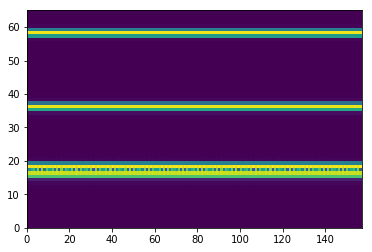

In [7]:
plt.pcolormesh(magSpectrogram.transpose())
print(magSpectrogram.shape)


In [10]:
generatedSpecs = aContextEncoderSystem.generate(magSpectrogram, length=24, model_num=76002)

INFO:tensorflow:Restoring parameters from utils/saved_models/test_newArch_moreRandom_/model-test_newArch_moreRandom_76002.ckpt
Model restored.
(1, 157, 65)
(1, 158, 65)
(1, 159, 65)
(1, 160, 65)
(1, 161, 65)
(1, 162, 65)
(1, 163, 65)
(1, 164, 65)
(1, 165, 65)
(1, 166, 65)
(1, 167, 65)
(1, 168, 65)
(1, 169, 65)
(1, 170, 65)
(1, 171, 65)
(1, 172, 65)
(1, 173, 65)
(1, 174, 65)
(1, 175, 65)
(1, 176, 65)
(1, 177, 65)
(1, 178, 65)
(1, 179, 65)
(1, 180, 65)


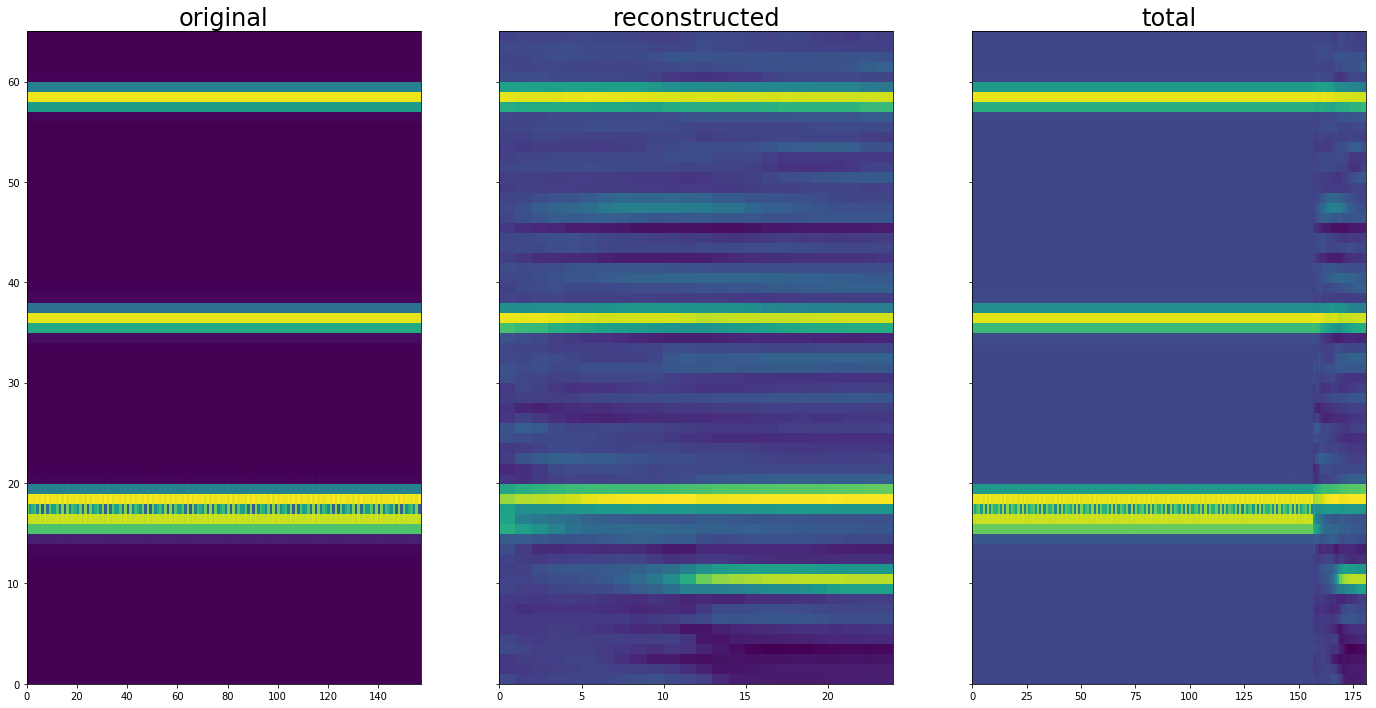

In [11]:
f, axarr = plt.subplots(1, 3, sharey='row', figsize=(24, 12))

axarr[0].pcolormesh(generatedSpecs[:157].transpose())
axarr[0].set_title('original', size=24)
axarr[1].pcolormesh(generatedSpecs[157:].transpose())
axarr[1].set_title('reconstructed', size=24)
axarr[2].pcolormesh(generatedSpecs.transpose())
axarr[2].set_title('total', size=24);

In [5]:
generatedSpecs.shape

(1, 160, 65)

In [12]:
import matplotlib as mpl
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use